<div style="display: flex; justify-content: space-between; align-items: flex-start; margin: 0px 0px 5px 0px;">
    <div style="text-align: left;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/b/b6/HULT_IBS_Logo_Outline_Black_%28cropped%29.png" width="150" style="margin: 10px 0px 5px 0px;"/>
        <div style="margin: 0px 0px 0px 0px;">
            <span style="color: #808080;"><b>Date:</b> 23 February 2024<br></span>
        </div>
    </div>
    
<div style="float: right; margin: 10px 15px 15px 50px; text-align: center;">
        <a href="https://www.linkedin.com/in/surajudasi/" target="_blank" style="color: #2B547E;">
            <img src="https://media.licdn.com/dms/image/D4E03AQFQYxwabge-wA/profile-displayphoto-shrink_400_400/0/1698184459749?e=1713398400&v=beta&t=fcUb7V9C3GWKl76YvQDj9KJCRW4IcmXIGKERGPutWOU" style="border: 5px solid #2B547E; border-radius: 40%; width: 150px;">
        </a>
        <br>
        <b style="color: #2B547E; display: block;">Suraj Udasi</b>
</div>

<div style="text-align: right; margin: 10px 15px 15px 50px;">
    <b style="font-size: 30px; color: #808080;">Kaggle Competition </b><br>
    <a href="https://www.kaggle.com/competitions/spaceship-titanic" target="_blank" style="color: #2B547E">
        <em style="font-size: 16px; color: #2B547E;"><strong>Spaceship Titanic</strong></em>
    </a>
    <br>
    <em style="color: #808080;">Machine Learning</em><br>
</div>


# Introduction

The Spaceship Titanic, an interstellar passenger liner launched a mere month ago, embarked on a voyage with nearly 13,000 passengers bound for three newly habitable planets. While en route to its first destination near 55 Cancri E, the vessel encountered an unforeseen spacetime anomaly concealed within a dust cloud near Alpha Centauri. This encounter mirrored the fate of its historical namesake, resulting in the displacement of nearly half the passengers to an alternate dimension.

Now, the challenge lies in utilizing recovered records from the ship's compromised computer system to aid rescue efforts and determine the identities of those affected by the anomaly. This task is critical in potentially mitigating the consequences of this unprecedented event and facilitating the safe return of the displaced individuals. The main priority was identifying the passengers transported to an alternate dimension due to the anomaly. This step was crucial to ensure their safety and facilitating their rescue. In addition, knowing the identity of the missing passengers will allow authorities to communicate with their families and provide them with updated information about the situation.



# Insights

- Approximately half of the passengers were transported by the spacetime anomaly. We have information on 8,693 passangers on board from a total of ~13K passengers.
- Cryo status and home planet have notable impacts on the likelihood of being transported, where individuals from Europa that were in cryosleep have a 98.90% likelihood of being transported. 
- Though most passengers on board were from Earth, Europa's spending power was over 5x higher. averaging `$3,469` rather than Earth's `$671.`   
- The highest decks (A,B and C) comprised entirely of European citizens while deck G was occupied by Earth citizens only. 
- Passengers residing on decks B and C had the highest transportation rates, 73.63% and 67.56% respectively. Decks E and T had the lowest, 37.40% and 33.33% respectively. 


_Insights were driven before feature engineering was implemented._

# Recommendations 

**Targeting Rescue Efforts: Decks B and C, Starboard Side**
- To maximize the effectiveness of rescue operations, the team should focus efforts on decks B and C, particularly on the starboard side. Analysis indicates a higher concentration of transported passenger cabins in these areas, suggesting a greater likelihood of occupants needing assistance. By prioritizing these zones, rescue teams can streamline efforts and allocate resources efficiently, increasing the chances of locating and rescuing trapped individuals. Additionally, concentrating on the starboard side, where transportation rates are higher, allows for a strategic approach to navigate through the affected areas. This targeted strategy ensures that rescue efforts are directed where they are most needed, optimizing the team's ability to retrieve passengers.

**Prioritize Cryo-Sleep Passengers:**
- Understanding the importance of prioritizing cryo-sleep passengers as they are more likely to be transported, the rescue team should prioritize locating and rescuing these individuals as they navigate through the black hole.

**Prioritize Europaens**
- Rescue efforts should prioritze passengers traveling from Europa as these had the highest transportation rates.

# Conclusion

The disparity in transportation rates among passengers from different planets, along with the significantly higher spending power of those from Europa, indicates socioeconomic factors that could correlate with the safety or risk levels experienced by passengers. Further, the anomaly's impact was highly selective, with a substantial probability of transportation tied to specific passenger profiles and locations on the ship. The fact that individuals from Europa who were in cryosleep had an extremely high likelihood of being transported (98.90%) suggests that both the condition of cryosleep and the passenger's origin are critical factors in the anomaly's effect. 
Given that CatBoost emerged as the best predictive model, rescue coordination efforts should leverage this machine learning insight to further refine their search and rescue operations, ensuring that they are as efficient and effective as possible.

This analysis provided key information to our rescue teams allowing them to identify critical impact points on the ship and increase the chance of success at rescuing transported passengers.

# Assumptions
- Families should not be bigger than 50, there might be people with same last name
- Passengers with the same surname are likely from the same planet
- Majority of groups contain only one family
- Passengers traveling in the same group are also on the same cabin deck/side
    <hr style="height: 4px; background-color: #2B547E;">
</h1>

# Load Data

In [1]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import time
from pathlib import Path
import pydotplus
from six import StringIO
from IPython.display import Image 

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn import metrics

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
# Set pd printing options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 505)
pd.set_option('display.width', 1000)

In [3]:
# Specify file path
trainfile = Path('data').joinpath('train.csv')
testfile = Path('data').joinpath('test.csv')

# Reading datasets
train = pd.read_csv(trainfile)
test = pd.read_csv(testfile)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Exploration

The dataset comprises passenger information, including demographics, cabin details, and expenditure on board. Initial exploration revealed missing values and categorical variables requiring encoding. Notably, features like HomePlanet, CryoSleep, and expenditures such as RoomService, FoodCourt and Spa were crucial for the analysis. A combination of data preprocessing techniques was applied, including missing value imputation, feature engineering (e.g., creating ageGroup and familySize variables), and encoding categorical variables. For predictive modeling, several algorithms were explored, including Logistic Regression, Random Forest, and Gradient Boosting, ultimately focusing on CatBoost for its performance and handling of categorical data directly. Model tuning was performed using GridSearchCV to optimize hyperparameters.

In [4]:
# Check for missing values (train)
train.isna().sum() 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# Check for missing values (test)
test.isna().sum() 

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [6]:
# Check unique values (train)
train.nunique() 

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [7]:
# Check distribution of target variable - shows high balance, so no need for oversampling
train.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [8]:
# Statistical summary
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Insights:

- Train set contains information on 8,693 passengers from 3 planets, going to 3 destinations
- Most passengers come from Earth
- Majority of passengers is not in cryo sleep and not VIP
- Passengers spend the most amount of money in the FoodCourt on average

## Visual Data Exploration
#### Age Distribution by 'Transported'

Text(0.5, 0, 'Age')

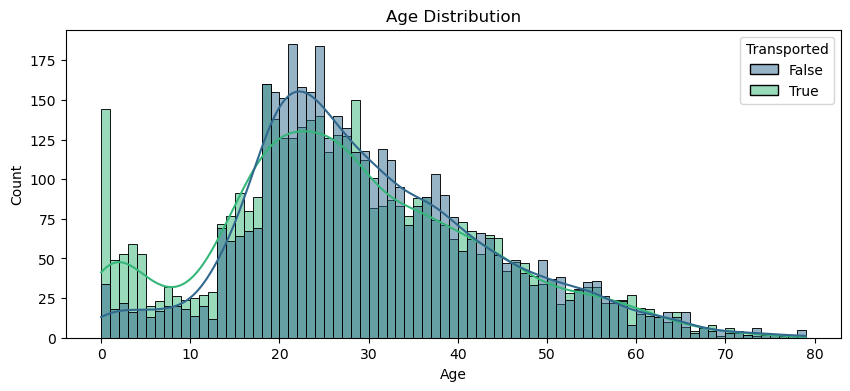

In [9]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram for the age 
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True, palette= 'viridis')

# Labeling
plt.title('Age Distribution')
plt.xlabel('Age')

Insights:

Notably, a significant number of younger passengers, particularly those under 18, were transported. Conversely, the likelihood of being transported decreases with age. The most populous age group aboard the spaceship falls between 20-35 years, indicating a primarily young adult demographic. This insight suggests that any rescue or intervention plans should prioritize resources and efforts towards younger passengers, especially children, who appear more vulnerable to being transported. The majority of passengers fall within the age of 20-35, suggesting that rescue resources could be optimized for this demographic which is the majority of the passenger list.

#### Distribution of Expenses by 'Transported'

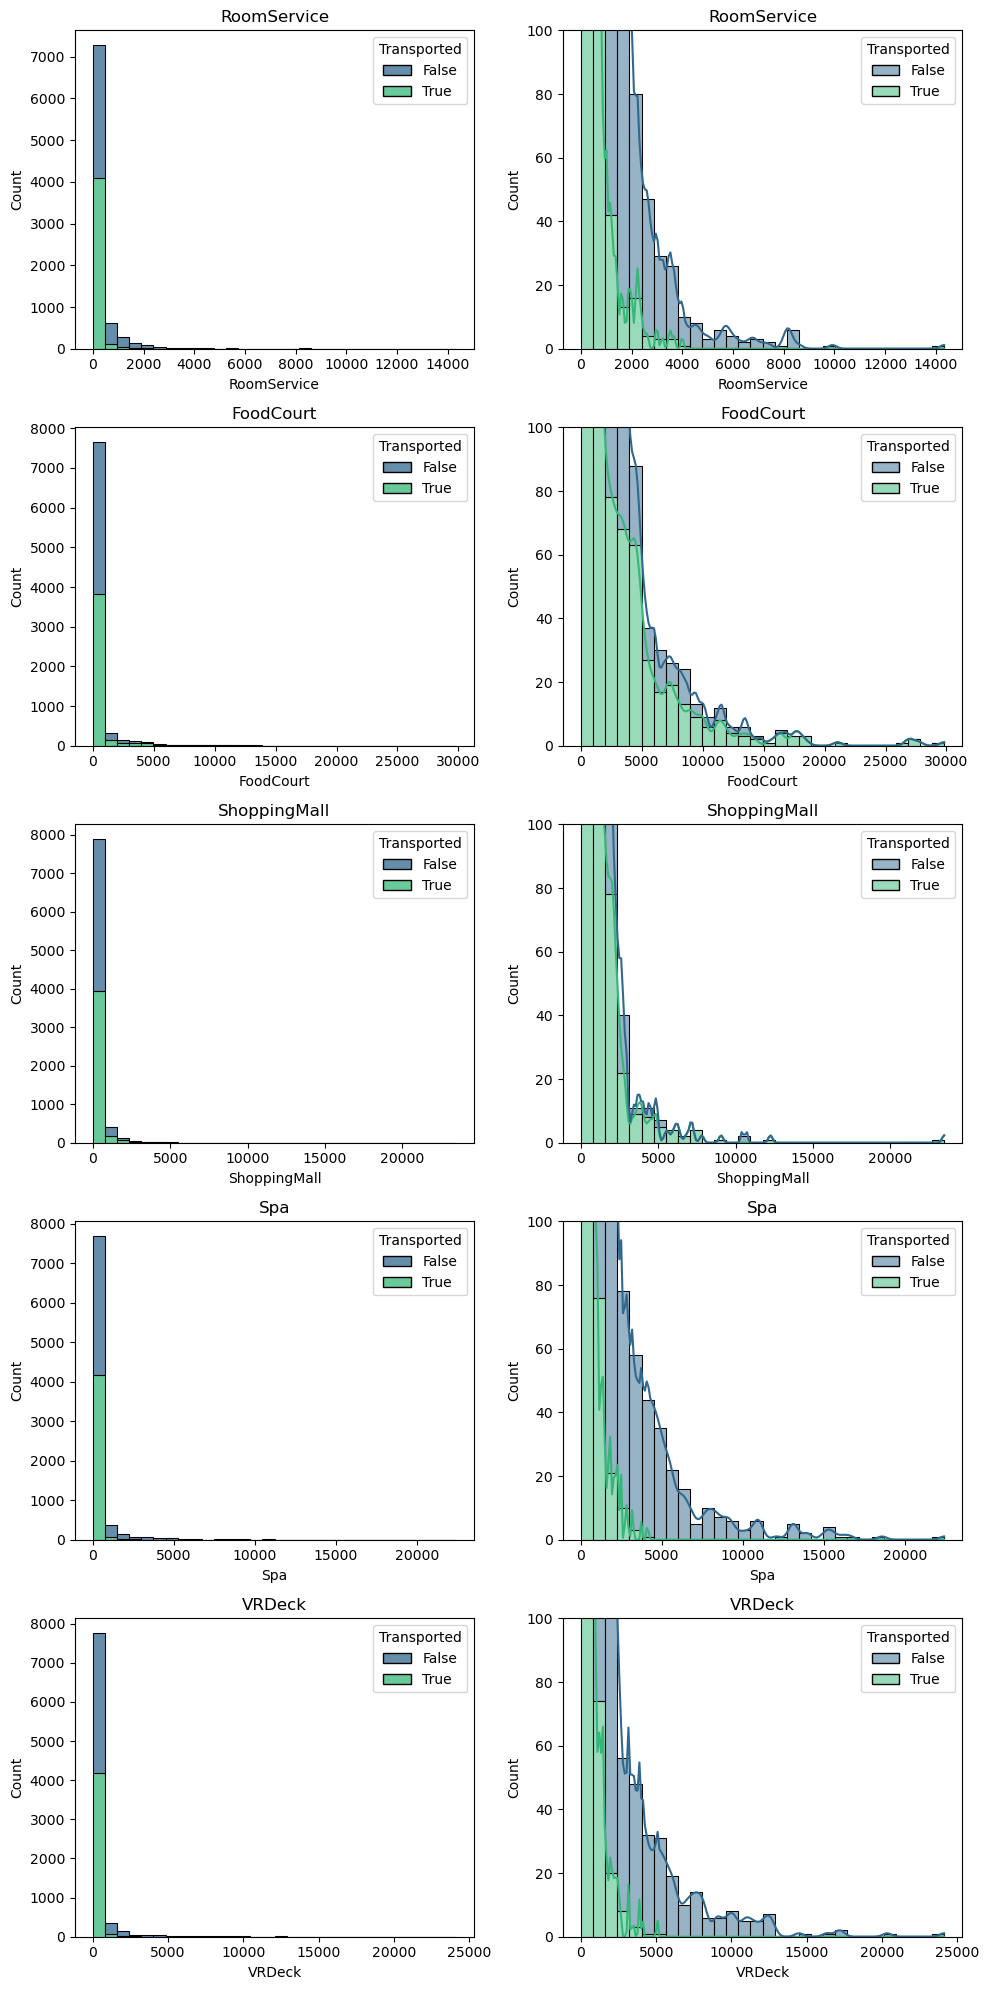

In [10]:
# Combine all expenses
expFeats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenses
fig = plt.figure(figsize=(10, 20))
for i, varName in enumerate(expFeats):
    # A: Normal Plot
    ax = fig.add_subplot(5, 2, 2*i+1)
    sns.histplot(data=train, x=varName, ax=ax, bins=30, kde=False, hue='Transported', multiple='stack',  palette='viridis')
    ax.set_title(varName)
    
    # B: Zoomed In Plot Due to Skewness
    ax = fig.add_subplot(5, 2, 2*i+2)
    sns.histplot(data=train, x=varName, ax=ax, bins=30, kde=True, hue='Transported', multiple='stack',  palette='viridis')
    plt.ylim([0, 100])
    ax.set_title(varName)

fig.tight_layout() 
plt.show()

Insights:

Reviewing the expenditure patterns on services like the FoodCourt, ShoppingMall, Spa, and VRDeck, there is a noticable large span, indicating that most passengers spend modestly, with a few high spenders. Interestingly, passengers with high VRDeck, RoomService and Spa seem less likely to be transported. These insights suggest that in formulating a rescue plan, priority might be given to younger passengers and those who have spent less, as they are more likely to being transported to another dimension. 

#### Categorical Features by 'Transported'

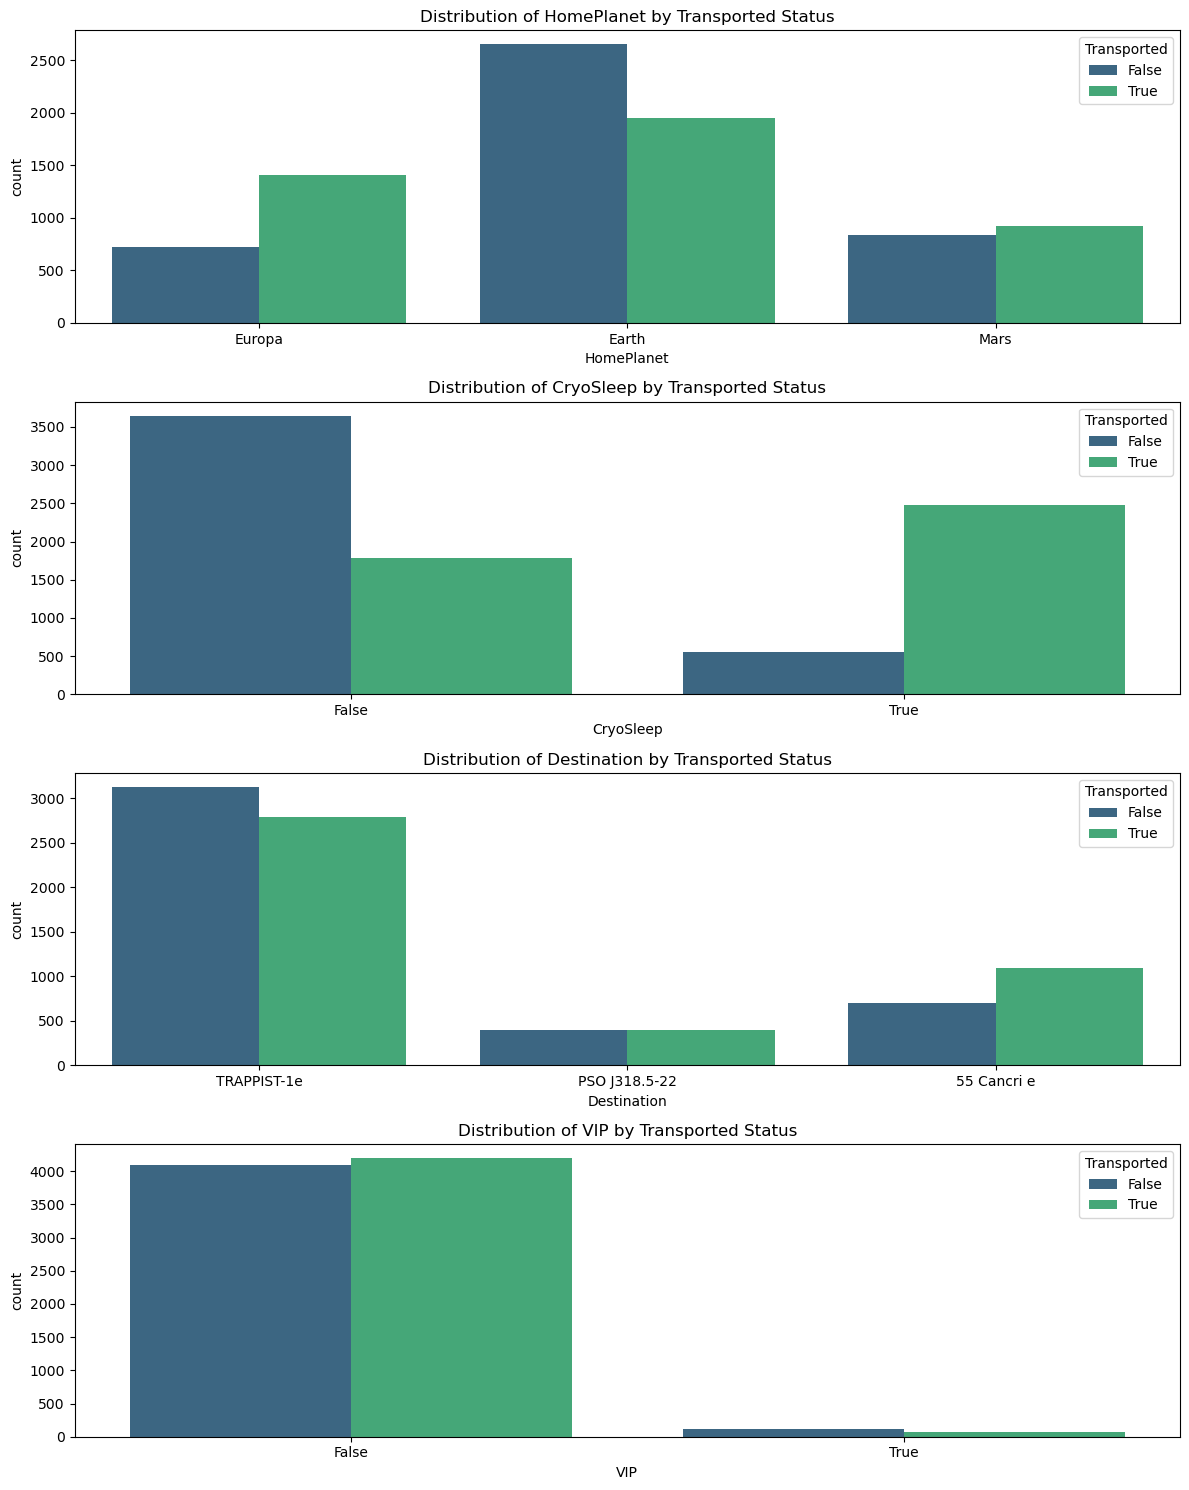

In [11]:
# Combine categorical features
catFeats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig = plt.figure(figsize=(12, 15))
for i, varName in enumerate(catFeats):
    ax = fig.add_subplot(4, 1, i + 1)
    sns.countplot(data=train, x=varName, ax=ax, hue='Transported', palette='viridis') 
    ax.set_title(f'Distribution of {varName} by Transported Status')
fig.tight_layout()
plt.show()

Insights:

The data indicates that while most passengers are from Earth, those from Europa exhibit a higher rate of being transported. This suggests a potential correlation between home planet and the likelihood of transport that may require further investigation. Additionally, passengers in cryo sleep have a greater likelihood of transport. This could be due to their location or status on the spaceship, hinting at a need for safety measures specific to these areas or conditions. Interestingly, the majority of passengers do not hold VIP status, which could suggest that VIP status is not a significant factor in the likelihood of being transported. 

## Data Massaging
### A) Feature Engineering

In [12]:
# Preparing train for merge with test set
yVar = train['Transported'].copy().astype(int) # define target variable and translate to integer (1 & 0)
xVar = train.drop('Transported', axis=1).copy() # define x variables (everything except for target 'Transported')

# Concat test and train
allData = pd.concat([xVar, test], axis=0).reset_index(drop=True)

In [13]:
# Double-check concat and initial number of NAs
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


__Create Age Groups__

- Child: <=13
- Teenager to Young Adult: 13 - 30
- Adult: 30 - 40
- Middle-Aged: 40 - 70
- Senior: 70+

In [14]:
# Initialize a feature 'ageGroup' 
allData['ageGroup'] = np.nan

# Assigning values to 'ageGroup' based on age range
allData.loc[allData['Age'] <= 13, 'ageGroup'] = 'Child (<13)'
allData.loc[(allData['Age'] > 13) & (allData['Age'] <= 30), 'ageGroup'] = 'Ages 12 - 30'
allData.loc[(allData['Age'] > 30) & (allData['Age'] <= 40), 'ageGroup'] = 'Ages 30 - 40'
allData.loc[(allData['Age'] > 40) & (allData['Age'] <= 70), 'ageGroup'] = 'Ages 40 - 70'
allData.loc[allData['Age'] > 70, 'ageGroup'] = 'Ages 70+'

__Splitting Qualitative Features to Create New Features__

In [15]:
# Qualitative features
qualFeats = ['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
allData[qualFeats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


- 'PassengerId': Each ID takes the form _gggg_pp_ where _gggg_ indicates a group the passenger is travelling with and _pp_ is their number within the group. People in a group are often family members, but not always.

- 'Cabin': Takes the form deck/num/side, where side can be either _P_ for Port or _S_ for Starboard.

In [16]:
# 1. Identify groups
# Split 'PassengerID' into group and number
allData['Group'] = allData['PassengerId'].str.split('_').str[0].astype(int) 

# 2. Feature for passengers traveling alone
# Create boolean feature 'soloTravel' for people traveling alone
group_counts = allData['Group'].value_counts()
allData['soloTravel'] = (allData['Group'].map(group_counts) == 1).astype(int) 

In [17]:
# 3. Split Cabin

# Replace empty values with placeholder to enable splitting
allData['Cabin'].fillna('Z/9999/Z', inplace=True)

# Split cabin into deck, number, and side
allData['cabinDeck'] = allData['Cabin'].apply(lambda x: x.split('/')[0]) # deck
allData['cabinSide'] = allData['Cabin'].apply(lambda x: x.split('/')[2]) # side

# Refill empty values
allData.loc[allData['cabinDeck']=='Z', 'cabinDeck']=np.nan
allData.loc[allData['cabinSide']=='Z', 'cabinSide']=np.nan

# Drop cabin, no longer needed
allData.drop('Cabin', axis=1, inplace=True)

In [18]:
# Check value counts for deck
allData['cabinDeck'].value_counts()

cabinDeck
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

In [19]:
# Check value counts for side
allData['cabinSide'].value_counts() 

cabinSide
S    6381
P    6290
Name: count, dtype: int64

__Creating Features for Expenses__

In [20]:
# 1. Create new feature 'Spend', summing up all expenses
allData['Spend'] = allData[expFeats].sum(axis=1) 

# 2. Create boolean feature 'noSpend' to indicate if passengers spend money or not with 1 = TRUE (no money spend)
allData['noSpend'] = (allData['Spend'] == 0).astype(int) 

__Creating Feature 'surname' to Identify Families__

In [21]:
# 1. Replace missing values with placeholder to enable split 
allData['Name'].fillna('Unknown Unknown', inplace=True)

# 2. Create feature for 'surname' by splitting 'Name' (Assumption: No passengers with two last names)
allData['surname'] = allData['Name'].str.split().str[-1]

# 3. Create feature 'familySize' counting PassengerId by 'surname'
allData['familySize'] = allData.groupby('surname')['PassengerId'].transform(len)

# 4. Refill missing values
allData.loc[allData['surname']=='Unknown','surname']=np.nan

# 5. Drop name column, as no longer needed
allData.drop('Name', axis=1, inplace=True)

In [22]:
allData['familySize'].describe()

count    12970.000000
mean        13.724287
std         42.825192
min          1.000000
25%          5.000000
50%          7.000000
75%         10.000000
max        294.000000
Name: familySize, dtype: float64

In [23]:
# Limit family size and insert NaNs
allData.loc[allData['familySize']>50,'familySize']=np.nan # Assumption: Families should not be bigger than 50, there might be people with same last name

In [24]:
# Check updated dataframe with engineered features
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  ageGroup      12700 non-null  object 
 12  Group         12970 non-null  int32  
 13  soloTravel    12970 non-null  int32  
 14  cabinDeck     12671 non-null  object 
 15  cabinSide     12671 non-null  object 
 16  Spend         12970 non-null  float64
 17  noSpend       12970 non-null  int32  
 18  surname       12676 non-nu

__Creating feature 'BigSpender'__

In [25]:
# Create a variable for spending outliers
allData['BigSpender'] = ((allData['Spa'] > 5000) & 
                        (allData['VRDeck'] > 5000) & 
                        (allData['RoomService'] > 5000)).astype(int)

__Creating feature 'Protected'__

In [26]:
# Create a variable for passengers in cryo or in decks B and C as these groups had highest transportation rates
allData['Protected'] = ((allData['CryoSleep'] == 1) | (allData['cabinDeck'].isin(['B', 'C']))).astype(int)

### B) Handling Missing Values

As Gupta (2018, p.5) said "Quality of a model is not governed by complexity but rather by its ability to account for real trends and variations in data and sift information from noise". Therefore, there is a need to fill NA values logically in order to ensure high model accuracy. From the EDA process, one insight was that certain cabin decks are home planet specific. For example, missing values in the HomePlanet column will be filled with Europa if cabinDeck column is 'A', 'B', 'C', or 'T'. This is based on the assumption or knowledge that these cabin decks are exclusively occupied by passengers from Europa.

In [27]:
# Make a list with all columns that have missing values
naCols = allData.columns[allData.isna().any()].tolist() 

# Summary of Missing Values
missingVal = pd.DataFrame(allData[naCols].isna().sum(), columns=['numberMissing']) 
missingVal['percentMissing']=np.round(100*missingVal['numberMissing']/len(allData),2) 
missingVal

,numberMissing,percentMissing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


Insight:
- Small amount of missing values per variable, yet this has an effect on the analysis' outcome. Hence, filling these missing values with logic can significantly increase the accuracy of later predictions, rather than just dropping missing values.


__Replace Home Planet NAs__

<Axes: xlabel='cabinDeck', ylabel='HomePlanet'>

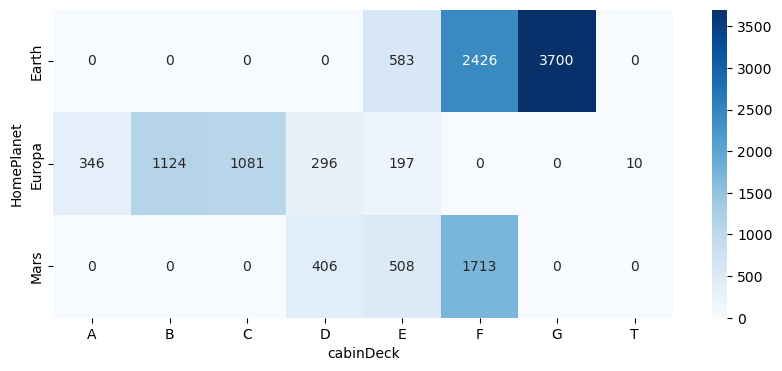

In [28]:
# 1. Fill missing home planet by deck
# Group passengers by deck and home planet
deckPlanet = allData.groupby(['cabinDeck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Make a heatmap of the values 
plt.figure(figsize=(10,4))
sns.heatmap(deckPlanet.T, annot=True, fmt='g', cmap='Blues')

Insight: 

It is evident that there is a strong correlation between certain decks and the passengers' planets of origin. Deck B is predominantly occupied by Europa residents, while Deck G is mostly occupied by those from Earth. This pattern may suggest socio-economic or cultural segmentation that could be vital in crafting targeted communication and rescue efforts.

In [29]:
# Missing values before
print('Missing values before:', allData['HomePlanet'].isna().sum())

# Decks A, B, C or T exclusive to Europa
allData.loc[(allData['HomePlanet'].isna()) & (allData['cabinDeck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G exclusive to Earth
allData.loc[(allData['HomePlanet'].isna()) & (allData['cabinDeck']=='G'), 'HomePlanet']='Earth'

# Missing values left
print('Missing values after:',allData['HomePlanet'].isna().sum())

Missing values before: 288
Missing values after: 160


In [30]:
# 2. Fill missing home planet for groups traveling together
# Group passengers by 'group' and 'HomePlanet'
groupPlanet = allData.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
groupPlanet # Passengers from the same home planet are in the same group 

# Missing values before
print('Missing values before:', allData['HomePlanet'].isna().sum())

# Fill the missing HomePlanet values according to the group
# Select rows with missing values in 'HomePlanet' & match with index of 'groupPlanet' 
index = allData[allData['HomePlanet'].isna()][(allData[allData['HomePlanet'].isna()]['Group']).isin(groupPlanet.index)].index

# Fill in missing values based on index variable
groupsToPlanet = dict(groupPlanet.idxmax(axis=1))
allData.loc[index, 'HomePlanet'] = allData.loc[index, 'Group'].map(groupsToPlanet)

# Missing values left
print('Missing values after:',allData['HomePlanet'].isna().sum())

Missing values before: 160
Missing values after: 94


In [31]:
# 3. Fill Home Planet by Surname (Assumption: Passengers with the same surname are likely from the same planet)
# Group passengers by surname and HomePlanet
surnamePlanet=allData.groupby(['surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Missing values before
print('Missing values before:', allData['HomePlanet'].isna().sum())

# Select rows with missing values in 'HomePlanet' & match with index of 'surnamePlanet' 
index = allData[allData['HomePlanet'].isna()][(allData[allData['HomePlanet'].isna()]['surname']).isin(surnamePlanet.index)].index

# Fill in missing values based on index variable
allData.loc[index,'HomePlanet']=allData.iloc[index,:]['surname'].map(lambda x: surnamePlanet.idxmax(axis=1)[x])

# Missing values left
print('Missing values after:',allData['HomePlanet'].isna().sum())

Missing values before: 94
Missing values after: 10


In [32]:
# 4. Fill HomePlanet by Destination
# Check remaing NaNs
allData[allData['HomePlanet'].isna()] # ALl of them are travelling to TRAPPIST

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ageGroup,Group,soloTravel,cabinDeck,cabinSide,Spend,noSpend,surname,familySize,BigSpender,Protected
2274,2443_01,NaN,False,TRAPPIST-1e,31.0,False,1458.0,421.0,76.0,0.0,0.0,Ages 30 - 40,2443,1,D,P,1955.0,0,NaN,NaN,0,0
2631,2817_01,NaN,False,TRAPPIST-1e,25.0,False,237.0,0.0,910.0,0.0,12.0,Ages 12 - 30,2817,1,F,P,1159.0,0,Sutty,1.0,0,0
3091,3331_01,NaN,False,TRAPPIST-1e,40.0,False,666.0,4.0,83.0,0.0,50.0,Ages 30 - 40,3331,1,F,S,803.0,0,NaN,NaN,0,0
4548,4840_01,NaN,True,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,0.0,Ages 30 - 40,4840,1,F,S,0.0,1,NaN,NaN,0,1
5762,6108_01,NaN,False,TRAPPIST-1e,13.0,False,206.0,28.0,0.0,1.0,629.0,Child (<13),6108,1,F,S,864.0,0,NaN,NaN,0,0
8969,0616_01,NaN,False,TRAPPIST-1e,31.0,False,0.0,428.0,NaN,1154.0,1025.0,Ages 30 - 40,616,1,E,S,2607.0,0,Spriney,1.0,0,0
10583,4052_01,NaN,False,TRAPPIST-1e,26.0,False,6.0,5903.0,0.0,240.0,72.0,Ages 12 - 30,4052,1,D,P,6221.0,0,Coneveseng,1.0,0,0
11913,7065_01,NaN,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Ages 12 - 30,7065,1,E,S,0.0,1,Maltorted,2.0,0,1
12551,8435_01,NaN,NaN,TRAPPIST-1e,19.0,False,162.0,11.0,0.0,0.0,1216.0,Ages 12 - 30,8435,1,F,P,1389.0,0,NaN,NaN,0,0
12725,8775_01,NaN,True,TRAPPIST-1e,40.0,False,0.0,0.0,0.0,0.0,0.0,Ages 30 - 40,8775,1,D,P,0.0,1,Maltorted,2.0,0,1


<Axes: xlabel='HomePlanet', ylabel='Destination'>

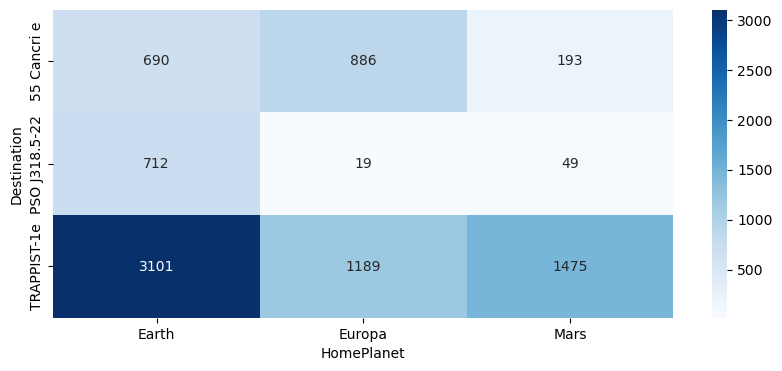

In [33]:
# Check distribution of homeplanet and destination to find a pattern
destPlanet = xVar.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap 
plt.figure(figsize=(10,4))
sns.heatmap(destPlanet.T, annot=True, fmt='g', cmap='Blues')


Insight: 

The strongest passenger flows are from Earth to TRAPPIST-1e, and from Europa to PSO J318.5-22, indicating popular routes or preferred destinations for these populations. Notably, the route from Mars to 55 Cancri e has a relatively lower volume, suggesting it is less favored or possibly newer and not yet fully adopted by travelers from Mars.
Combining these insights with the previously gained knowledge on deck distribution, the 10 remaining missing values for home planet can be filled strategically.

In [34]:
# Insight: Most people traveling to TRAPPIST from Earth and Mars
# Missing values before
print('Missing values before:', allData['HomePlanet'].isna().sum())

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
allData.loc[(allData['HomePlanet'].isna()) & ~(allData['cabinDeck']=='D'), 'HomePlanet']='Earth'
allData.loc[(allData['HomePlanet'].isna()) & (allData['cabinDeck']=='D'), 'HomePlanet']='Mars'

# Missing values left
print('Missing values after:',allData['HomePlanet'].isna().sum())

Missing values before: 10
Missing values after: 0


__Replace Destination NAs__

In [35]:
# Majority of passengers are going to TRAPPIST
# Use mode to fill in the missing values 

# Missing values before
print('Missing values before:', allData['Destination'].isna().sum())

# Fill missing Destination values with mode
allData.loc[(allData['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Missing values left
print('Missing values after:',allData['Destination'].isna().sum())

Missing values before: 274
Missing values after: 0


__Replace Surname NAs__

In [36]:
# Assumption: Majority of groups contain only 1 family
# Missing values before
print('Missing values before:', allData['surname'].isna().sum())

# Fill missing values according to the majority surname in the group
groupSurname = allData[allData['soloTravel']==0].groupby(['Group','surname'])['surname'].size().unstack().fillna(0)

# Select rows with missing values in 'surname' & match with index of 'groupSurname'
index = allData[allData['surname'].isna()][(allData[allData['surname'].isna()]['Group']).isin(groupSurname.index)].index

# Fill in missing values based on index variable
allData.loc[index,'surname'] = allData.iloc[index,:]['Group'].map(lambda x: groupSurname.idxmax(axis=1)[x])

# Missing values left
print('Missing values after:',allData['surname'].isna().sum())

Missing values before: 294
Missing values after: 155


#### Update Family Size - Based on filled Surname

In [37]:
# Insert 'Unknown' as placeholder where surname is missing
allData['surname'].fillna('Unknown', inplace=True)

# Update family size feature
allData['familySize']=allData['surname'].map(lambda x: allData['surname'].value_counts()[x])

# Refill NaN where 'surname' is unknown
allData.loc[allData['surname']=='Unknown','surname']=np.nan

# Reset familySize > 50 to 0 (to account for unknown surname)
allData.loc[allData['familySize']>50,'familySize']=0

__Replace Cabin (Side & Deck) NAs__

In [38]:
# 1. Add Cabin Side based on Group
# Assumption: Passengers traveling in the same group are also on the same cabin deck/side
groupSide = allData[allData['soloTravel']==0].groupby(['Group','cabinSide'])['cabinSide'].size().unstack().fillna(0)

# Missing values before
print('Cabin Side missing values before:', allData['cabinSide'].isna().sum())

# Select rows with missing values in 'cabinSide' & match with index of 'groupSide'
sideIndex = allData[allData['cabinSide'].isna()][(allData[allData['cabinSide'].isna()]['Group']).isin(groupSide.index)].index

# Fill in missing values based on index variable
allData.loc[sideIndex,'cabinSide']=allData.iloc[sideIndex,:]['Group'].map(lambda x: groupSide.idxmax(axis=1)[x])

# Print number of missing values left
print('Cabin Side missing values after:',allData['cabinSide'].isna().sum())

Cabin Side missing values before: 299
Cabin Side missing values after: 162


In [39]:
# 2. Add Cabin Side based on Surname
# 2.1 Validate assumption that passengers with same surname or on same cabin side

# Filter the DataFrame for passengers who are not traveling solo
non_solo_travelers = allData[allData['soloTravel'] == 0]

# Group the DataFrame by surname
grouped_by_surname = non_solo_travelers.groupby('surname')

# Initialize a counter for the cases where all passengers with the same surname are on the same cabin side
same_side_count = 0

# Iterate over each surname group
for surname, group in grouped_by_surname:
    # Check if there is only one unique value in the 'cabinSide' column for this surname group
    if len(group['cabinSide'].unique()) == 1:
        same_side_count += 1

# Calculate the total number of surnames
total_surnames = len(grouped_by_surname)

# Calculate the percentage of cases where all passengers with the same surname are on the same cabin side
percentage_same_side = (same_side_count / total_surnames) * 100

# Display the percentage
print("Percentage of cases where all passengers with the same surname are on the same cabin side:", percentage_same_side)


Percentage of cases where all passengers with the same surname are on the same cabin side: 76.64009809932557


In [40]:
# 2.2 Fill Cabin Side by Surname
surnameSide = allData[allData['soloTravel']==0].groupby(['surname','cabinSide'])['cabinSide'].size().unstack().fillna(0)

# Missing values before 
print('Cabin Side missing values before:', allData['cabinSide'].isna().sum())

# Select rows with missing values in 'cabinSide' & match with index of 'surname'
index = allData[allData['cabinSide'].isna()][(allData[allData['cabinSide'].isna()]['surname']).isin(surnameSide.index)].index

# Fill in missing values based on index variable
allData.loc[index,'cabinSide']=allData.iloc[index,:]['surname'].map(lambda x: surnameSide.idxmax(axis=1)[x])

# Drop surname - no longer needed 
allData.drop('surname', axis=1, inplace=True)

# Missing values left
print('Cabin Side missing values after:',allData['cabinSide'].isna().sum())

Cabin Side missing values before: 162
Cabin Side missing values after: 66


In [41]:
# Check for value counts to possibly identify mode
allData['cabinSide'].value_counts()

cabinSide
S    6504
P    6400
Name: count, dtype: int64

In [42]:
# 3. Since there is no clear mode we replace remaining missing values with alternative cabinSide
allData.loc[allData['cabinSide'].isna(),'cabinSide']='Z' 

# Check that all values are filled
print('Cabin Side missing values after:',allData['cabinSide'].isna().sum())

Cabin Side missing values after: 0


In [43]:
# 4. Add Cabin Deck based on Group
# Missing values before
print('Cabin deck missing values before:', allData['cabinDeck'].isna().sum())

# Assumption: Passengers traveling in the same group are also on the same cabin deck/side
groupDeck = allData[allData['soloTravel']==0].groupby(['Group','cabinDeck'])['cabinDeck'].size().unstack().fillna(0)

# Select rows with missing values in 'cabinDeck' & match with index of 'groupSide'
deckIndex = allData[allData['cabinDeck'].isna()][(allData[allData['cabinDeck'].isna()]['Group']).isin(groupDeck.index)].index

# Fill missing values
allData.loc[deckIndex,'cabinDeck']=allData.iloc[deckIndex,:]['Group'].map(lambda x: groupDeck.idxmax(axis=1)[x])

# Missing values left
print('Cabin deck missing values after:',allData['cabinDeck'].isna().sum())

Cabin deck missing values before: 299
Cabin deck missing values after: 162


In [44]:
# 4. Replace remaining missing values with mode
missingDeck =allData.loc[allData['cabinDeck'].isna(),'cabinDeck'].index

# Replace with mode for passengers of same home planet, destination and travel status (solo or not)
allData.loc[allData['cabinDeck'].isna(),'cabinDeck']=allData.groupby(['HomePlanet','Destination','soloTravel'])['cabinDeck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[missingDeck]

# Check that all values are filled
print('Cabin deck missing values after:',allData['cabinDeck'].isna().sum())

Cabin deck missing values after: 0


__Replace VIP Status NAs__

In [45]:
# Missing values before
print('Missing values before:', allData['VIP'].isna().sum())

# Since there were only very few VIPs, we replace missing values with mode 'False'
allData.loc[allData['VIP'].isna(),'VIP']=False

# Check that all values are filled
print('Missing values after:',allData['VIP'].isna().sum())

Missing values before: 296
Missing values after: 0


In [46]:
# Transform VIP as binary
allData['VIP'] = allData['VIP'].map({True:1, False: 0})

__Replace Age NAs__

In [47]:
# Missing values before
print('Missing values before:', allData['Age'].isna().sum())

# Fill missing values using the median of similar passenger groups (by 'HomePlanet','noSpend','soloTravel','cabinDeck')
missingAge = allData.loc[allData['Age'].isna(),'Age'].index
allData.loc[allData['Age'].isna(),'Age']=allData.groupby(['HomePlanet','noSpend','soloTravel','cabinDeck'])['Age'].transform(lambda x: x.fillna(x.median()))[missingAge]

# Missing values after
print('Missing values after:',allData['Age'].isna().sum())

Missing values before: 270
Missing values after: 0


In [48]:
# Update age bins (This was try-and-error to improve model accuracy, the following gave the most accurate results)
allData.loc[allData['Age'] <= 13, 'ageGroup'] = 'Child'
allData.loc[(allData['Age'] > 13) & (allData['Age'] <= 18), 'ageGroup'] = 'Teenager to Young Adult'
allData.loc[(allData['Age'] > 18) & (allData['Age'] <= 30), 'ageGroup'] = 'Teenager to Young Adult'
allData.loc[(allData['Age'] > 30) & (allData['Age'] <= 40), 'ageGroup'] = 'Adult'
allData.loc[(allData['Age'] > 40) & (allData['Age'] <= 70), 'ageGroup'] = 'Middle Aged'
allData.loc[(allData['Age'] > 50) & (allData['Age'] <= 60), 'ageGroup'] = 'Middle Aged'
allData.loc[(allData['Age'] > 60) & (allData['Age'] <= 70), 'ageGroup'] = 'Middle Aged'
allData.loc[allData['Age'] > 70, 'ageGroup'] = 'Senior'

__Replace Cryo NAs__

In [49]:
# Missing values before
print('Missing values before:', allData['CryoSleep'].isna().sum())

# From EDA we saw that passengers in Cryo Sleep do not spend money
# Fill missing values applying this logic
missingCryo = allData.loc[allData['CryoSleep'].isna(),'CryoSleep'].index
allData.loc[allData['CryoSleep'].isna(),'CryoSleep']=allData.groupby(['noSpend'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[missingCryo]

# Missing values after
print('Missing values after:',allData['CryoSleep'].isna().sum())

Missing values before: 310
Missing values after: 0


In [50]:
# Transform CryoSleep as binary
allData['CryoSleep'] = allData['CryoSleep'].map({True:1, False: 0})

__Replace Expenses Feature NAs__

In [51]:
# Missing values before
print('Missing values before:', allData[expFeats].isna().sum().sum())

# Reverse above applied logic where if CryoSleep = 0 then expFeats are 0
for col in expFeats:
    allData.loc[(allData[col].isna()) & (allData['CryoSleep']==1), col]=0

# Missing values after
print('Missing values after:',allData[expFeats].isna().sum().sum())

Missing values before: 1410
Missing values after: 866


In [52]:
# Fill remaining with median of subgroups (by 'HomePlanet','soloTravel','ageGroup')
for col in expFeats:
    missingExp = allData.loc[allData[col].isna(),col].index
    allData.loc[allData[col].isna(),col]=allData.groupby(['HomePlanet','soloTravel','ageGroup'])[col].transform(lambda x: x.fillna(x.mean()))[missingExp]
    
# Check that all values are filled
print('Missing values after:',allData[expFeats].isna().sum().sum())

Missing values after: 0


In [53]:
# Update expenses and noSpend
allData['Spend']=allData[expFeats].sum(axis=1)
allData['noSpend']=(allData['Spend']==0).astype(int)

In [54]:
# Update BigSpender and Protected
allData['Protected'] = ((allData['CryoSleep'] == 1) | (allData['cabinDeck'].isin(['B', 'C']))).astype(int)

allData['BigSpender'] = ((allData['Spa'] > 5000) & 
                        (allData['VRDeck'] > 5000) & 
                        (allData['RoomService'] > 5000)).astype(int)

In [55]:
allData.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
ageGroup        0
Group           0
soloTravel      0
cabinDeck       0
cabinSide       0
Spend           0
noSpend         0
familySize      0
BigSpender      0
Protected       0
dtype: int64

In [56]:
# Split the data back into train and test 
xVar = allData[allData['PassengerId'].isin(train['PassengerId'].values)].copy()
test = allData[allData['PassengerId'].isin(test['PassengerId'].values)].copy()

In [57]:
# Drop columns that are no longer needed
xVar.drop(['PassengerId', 'Group'], axis=1, inplace=True)
test.drop(['PassengerId', 'Group'], axis=1, inplace=True)

In [58]:
yVar.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int32

In [59]:
xVar.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ageGroup,soloTravel,cabinDeck,cabinSide,Spend,noSpend,familySize,BigSpender,Protected
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Adult,1,B,P,0.0,1,4,0,1
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Teenager to Young Adult,1,F,S,736.0,0,4,0,0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Middle Aged,0,A,S,10383.0,0,7,0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Adult,0,A,S,5176.0,0,7,0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Teenager to Young Adult,1,F,S,1091.0,0,9,0,0


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 8693 to 12969
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   int64  
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int64  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  ageGroup      4277 non-null   object 
 11  soloTravel    4277 non-null   int32  
 12  cabinDeck     4277 non-null   object 
 13  cabinSide     4277 non-null   object 
 14  Spend         4277 non-null   float64
 15  noSpend       4277 non-null   int32  
 16  familySize    4277 non-null   int64  
 17  BigSpender    4277 non-null   int32  
 18  Protected     4277 non-null  

### Normalization of Numerical Variables

In [61]:
# Check skewness of numerical columns
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Spend']
xVar[cols].skew()

RoomService      6.391560
FoodCourt        7.166446
ShoppingMall    12.767219
Spa              7.707228
VRDeck           7.897574
Spend            4.390519
dtype: float64

In [62]:
# log transform numerical features
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Spend']:
    xVar[col]=np.log(1+xVar[col])
    test[col]=np.log(1+test[col])

In [63]:
# Check updated skewness
xVar[cols].skew()

RoomService     1.081991
FoodCourt       1.082262
ShoppingMall    1.169778
Spa             1.055594
VRDeck          1.127816
Spend          -0.230314
dtype: float64

### Converting Categorical Variables

In [64]:
# List of all object columns
s = (xVar.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['HomePlanet', 'Destination', 'ageGroup', 'cabinDeck', 'cabinSide']

In [65]:
# Convert object columns to dummy variables
dummyVars = pd.get_dummies(xVar[object_cols])

# Concatenate dummy variables with the original DataFrame
xVarEncoded = pd.concat([xVar.drop(object_cols, axis=1), dummyVars],axis=1)

In [66]:
xVarEncoded.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,soloTravel,Spend,noSpend,familySize,BigSpender,Protected,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,ageGroup_Adult,ageGroup_Child,ageGroup_Middle Aged,ageGroup_Senior,ageGroup_Teenager to Young Adult,cabinDeck_A,cabinDeck_B,cabinDeck_C,cabinDeck_D,cabinDeck_E,cabinDeck_F,cabinDeck_G,cabinDeck_T,cabinSide_P,cabinSide_S,cabinSide_Z
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1,4,0,1,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,6.602588,0,4,0,0,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,9.248021,0,7,0,0,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,8.551981,0,7,0,0,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,6.995766,0,9,0,0,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False


In [67]:
# Creating dummies for test
dummyVarsTest = pd.get_dummies(test[object_cols])

# Concatenate dummy variables with the original DataFrame
testEncoded = pd.concat([test.drop(object_cols, axis=1), dummyVarsTest],axis=1)

# Fitting a Model
Splitting our training set `xVarEncoded` into 70% train / 30% validation:
- xVar_train = 70% of xVarEncoded to train the model
- xVar_train = 30% of xVarEncoded to validate the model
- yVar_train = 70% of yVar to train the model
- yVar_test = 30% of yVar to test the accuracy of model predictions

In [68]:
# Traintestsplit
xVar_train, xVar_test, yVar_train, yVar_test = train_test_split(
            xVarEncoded, 
            yVar, 
            test_size    = 0.3,
            stratify     = yVar,
            random_state = 1)

## 1. Logistic Regression
Logistic regression is used when you have a binary (dichotomous) dependent variable. In other words, it is appropriate when the outcome you are predicting is categorical and can be divided into two specific groups, such as "transported" vs. "Not Transported" also considered as Business Success and Business Failure in specific situations.


In [69]:
# Making a Pipeline using StandardScaler
logreg = make_pipeline(StandardScaler(), LogisticRegression())

logreg.fit(xVar_train, yVar_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [70]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(xVar_test, yVar_test)))
y_pred_logreg = logreg.predict(xVar_test)
print(classification_report(yVar_test, y_pred_logreg))

Accuracy of logistic regression classifier on test set: 0.78
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1295
           1       0.77      0.79      0.78      1313

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



The logistic regression model shows an accuracy of 78% on the test split, with a balanced f1-score for both business success (passenger got transported) and business failure.This will serve as a baseline to compare further models to based on their accuracy.

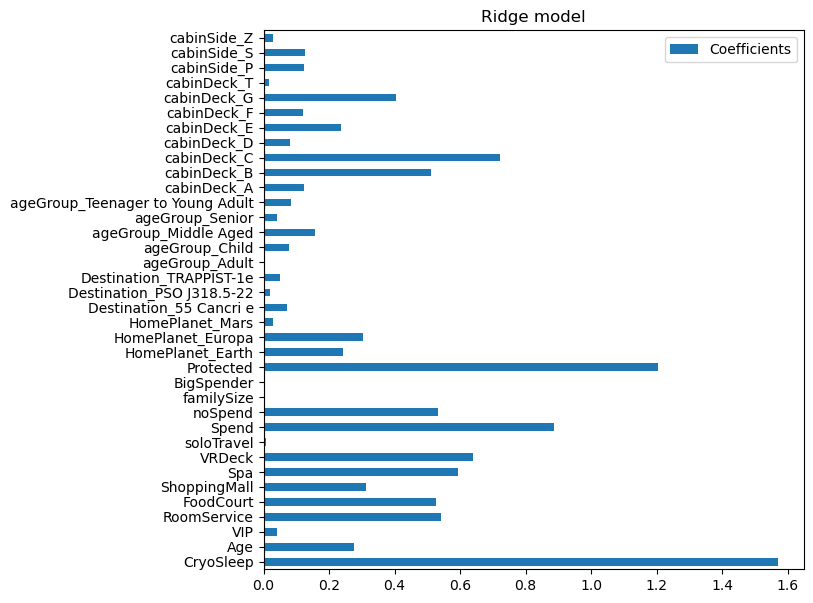

In [71]:
# Scaled Coefficients using Ridge Model
coefs = pd.DataFrame(
   np.abs(logreg.steps[1][1].coef_)[0],
   columns=['Coefficients'], index=xVar_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

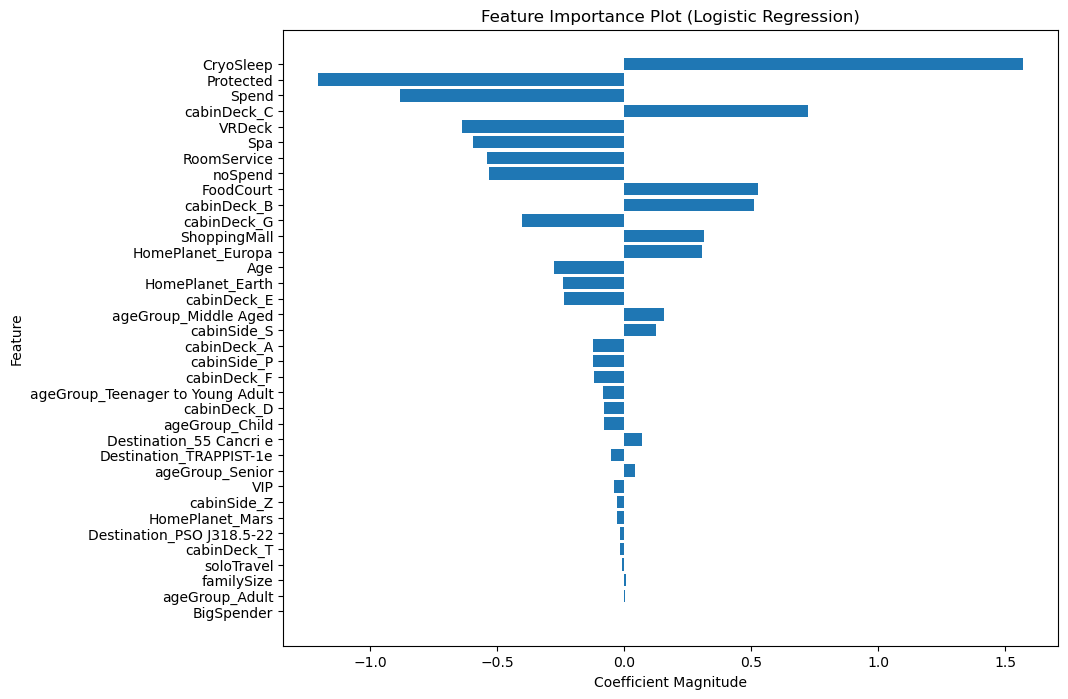

In [72]:
# Extract coefficients from the trained logistic regression model
coefficients = logreg.named_steps['logisticregression'].coef_[0]
feature_names = np.array(xVar_train.columns)

# Sort feature coefficients based on their absolute values
sorted_indices = np.argsort(np.abs(coefficients))
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Logistic Regression)')
plt.show()

Insight: 
    
The top three influential features positively affecting the odds of transportation include CryoSleep, residing in decks C and B, and FoodCourt spend, with 'CryoSleep' having the most substantial positive impact. This suggests that passengers who opted for cryo sleep are more likely to be transported.

Conversely, spending in areas such as RoomService, VRDeck and Spa are negatively associated with being transported, indicating that higher spenders in these areas might have a lower chance of transportation. The negative coefficients for 'HomePlanet_Earth' and 'Destination_55 Cancri e' suggest that being from Earth and heading to 55 Cancri e decreases the likelihood of transportation.

The insights from this model clearly highlight which passenger groups the rescue team will have to focus on, namely the ones in cryo sleep which correlates with lower spending, as well as the passengers that resided on decks B and C.

# 2. Decision Tree
A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. It is easy to interpret and therefore a favorable model to base a business decision on, such as which passengers to focus rescue efforts on.
##### Version 1 - Baseline Decision Tree Classifier

In [73]:
# Model initialization
tree = DecisionTreeClassifier()

# Fit the data(train the model)
tree.fit(xVar_train, yVar_train)

DecisionTreeClassifier()

In [74]:
# model evaluation
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(tree.score(xVar_test, yVar_test)))
y_pred_tree = tree.predict(xVar_test)
print(classification_report(yVar_test, y_pred_tree))

Accuracy of Decision Tree classifier on test set: 0.72
              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1295
           1       0.72      0.75      0.73      1313

    accuracy                           0.72      2608
   macro avg       0.73      0.72      0.72      2608
weighted avg       0.73      0.72      0.72      2608



When using a Decision Tree model, the accuracy reduces to 72%, with lower rates for recall and precision of the model. This indicates that the model is not favorable over the logistic regression, although it is easier to interpret. However, there is the option to improve the model by tuning it.

##### Version 2 - Improved Decision Tree Classifier

In [75]:
tunedtree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3)

# Fit the data(train the model)
tunedtree.fit(xVar_train, yVar_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [76]:
# model evaluation
print('Accuracy of Tuned Decision Tree classifier on test set: {:.2f}'.format(tunedtree.score(xVar_test, yVar_test)))
y_pred_tunedtree = tunedtree.predict(xVar_test)
print(classification_report(yVar_test, y_pred_tunedtree))

Accuracy of Tuned Decision Tree classifier on test set: 0.75
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1295
           1       0.72      0.81      0.76      1313

    accuracy                           0.75      2608
   macro avg       0.75      0.75      0.75      2608
weighted avg       0.75      0.75      0.75      2608



Tuning the decision tree model leads to an increased accuracy of 75%, which is a considerable improvement, yet not as high as the initial logistic regression model. Due to its high interpretability, it may still represent a feasible solution to predict transportation status and understand which passengers to focus rescue efforts on. Therefore, it will be visualized below.

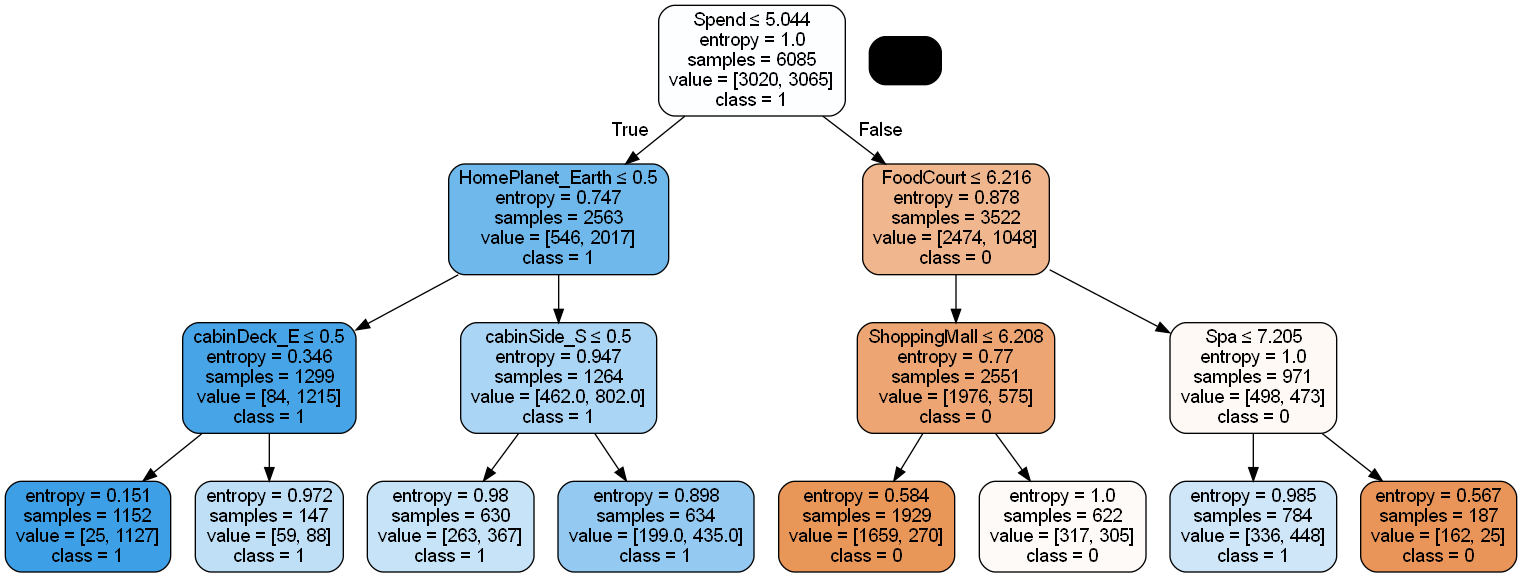

In [77]:
# Visualizing the Tree
dot_data = StringIO()
export_graphviz(tunedtree,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = xVarEncoded.columns,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tunedtree.png')
Image(graph.create_png())

Insight: 

The decision tree helps to identify the factors that are most predictive of whether a passenger was transported by the spacetime anomaly. The root of the tree starts with 'Spend', indicating that the amount spent is a primary factor in determining the outcome. Further down the tree, 'HomePlanet_Earth' feature splits, suggesting that passengers from Earth have different transportation probabilities than those from other planets. 
The leaves of the tree, which represent the final decision of transported, class = 1 or not transported, class = 0, show the class distribution of samples reaching that point. For example, earth passengers who did not spend above the threshold, did not have high expenditure in the FoodCourt, and were not on cabin deck E are less likely to be transported.

## 3. Random Forest Classifier

"Random Forest is an ensemble learning method that consists of multiple decision trees, which are used to define the final output. Random Forest is one of the most popular and powerful machine learning algorithms and one of the best among classification algorithms" (Gupta, 2018, p. 230). Due to its more complex nature, it is more difficult to interpret than a decision tree, yet it can lead to more accurate results.

##### Version 1 - Baseline Random Forest Classifier

In [78]:
# Random Forest with test-train split
rfor = RandomForestClassifier()
rfor.fit(xVar_train, yVar_train)

y_pred_rfor = rfor.predict(xVar_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfor.score(xVar_test, yVar_test)))
print(classification_report(yVar_test, y_pred_rfor))

Accuracy of Random Forest classifier on test set: 0.78
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1295
           1       0.80      0.75      0.78      1313

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



The initial Random Forest model has an accuracy of 78% on the test split, which is equal to the one of the logistic regression. By applying a grid search, this performance may be improved further.

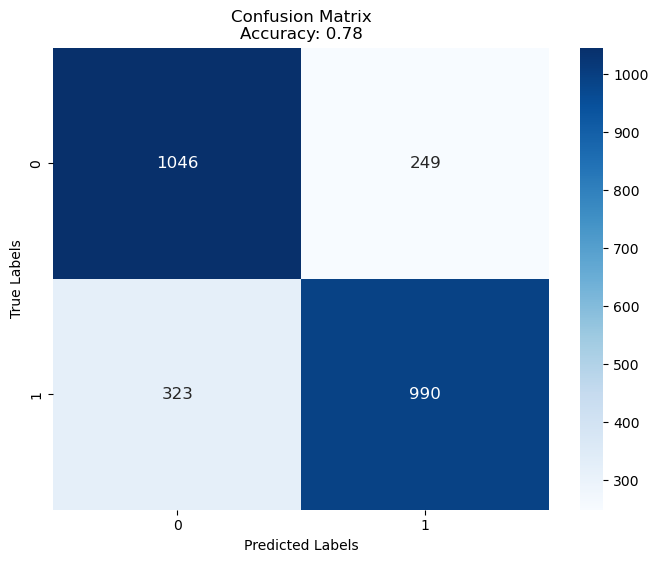

In [79]:
# Calculate accuracy
accuracy_rfor = accuracy_score(yVar_test, y_pred_rfor)

# Create confusion matrix
conf_matrix_rfor = confusion_matrix(yVar_test, y_pred_rfor)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfor, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_rfor:.2f}')
plt.show()

The confusion matrix represents that majority of predicted labels are true false and true negative. However, there are also 249 cases in which passengers where wrongly identified as transported, and 323 cases in which the model failed to predict that the passenger got transported.

##### Version 2 - Tuned Random Forest Classifier with Grid Search

In [80]:
''' 
from sklearn.preprocessing import RobustScaler

# Initialize the RandomForest Classifier
rfor_tuned = RandomForestClassifier()

# Define a smaller parameter grid due to computational constraints
param_grid_rfor = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini']  # Function to measure the quality of a split
}

# Setup GridSearchCV for RandomForestClassifier
grid_search_rfor = GridSearchCV(estimator=rfor_tuned, param_grid=param_grid_rfor, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Define a pipeline with RobustScaler and GridSearchCV
rfor_scaletuned = make_pipeline(RobustScaler(), grid_search_rfor)

# Fit the pipeline on the training data
rfor_scaletuned.fit(xVar_train, yVar_train)

# Print the mean accuracy for RandomForestClassifier
print('Mean accuracy for RandomForestClassifier:', rfor_scaletuned.score(xVar_train, yVar_train))

# Print the best parameters found by GridSearchCV
print("Best parameters found for RandomForestClassifier:")
print(rfor_scaletuned.named_steps['gridsearchcv'].best_params_)
'''

' \nfrom sklearn.preprocessing import RobustScaler\n\n# Initialize the RandomForest Classifier\nrfor_tuned = RandomForestClassifier()\n\n# Define a smaller parameter grid due to computational constraints\nparam_grid_rfor = {\n    \'n_estimators\': [100, 200],  # Number of trees in the forest\n    \'max_depth\': [None, 10, 20],  # Maximum depth of the tree\n    \'min_samples_split\': [2, 5],  # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2],  # Minimum number of samples required to be at a leaf node\n    \'criterion\': [\'gini\']  # Function to measure the quality of a split\n}\n\n# Setup GridSearchCV for RandomForestClassifier\ngrid_search_rfor = GridSearchCV(estimator=rfor_tuned, param_grid=param_grid_rfor, cv=3, n_jobs=-1, verbose=2, scoring=\'accuracy\')\n\n# Define a pipeline with RobustScaler and GridSearchCV\nrfor_scaletuned = make_pipeline(RobustScaler(), grid_search_rfor)\n\n# Fit the pipeline on the training data\nrfor_scaletuned

- Mean accuracy for RandomForestClassifier: 0.8588331963845521
- Best parameters found for RandomForestClassifier:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

In [81]:
# Tuned and Scaled RandomForest Classifier
rfor_tuned = make_pipeline(
    RobustScaler(),
    RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
)

rfor_tuned.fit(xVar_train, yVar_train)

y_pred_rfortuned = rfor_tuned.predict(xVar_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfor_tuned.score(xVar_test, yVar_test)))
print(classification_report(yVar_test, y_pred_rfortuned))

Accuracy of Random Forest classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1295
           1       0.80      0.82      0.81      1313

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



By applying the grid search, the model accuracy increased to 81%, making it the so far most accurate model to predict transportation status on the train test split.

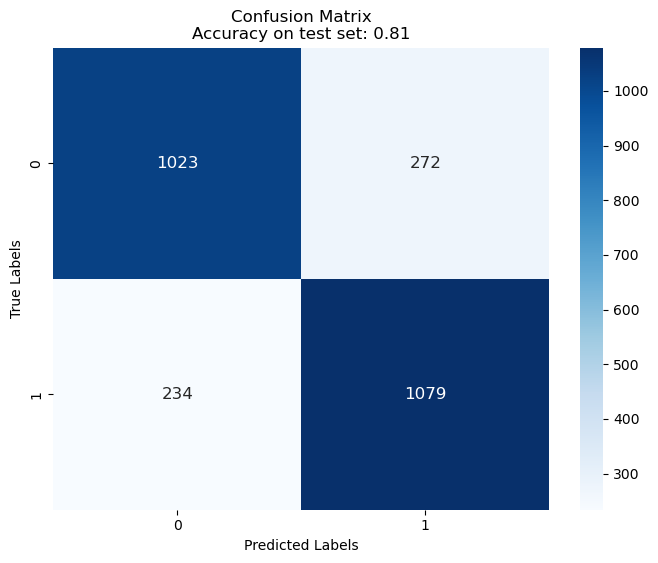

In [82]:
# Calculate accuracy
accuracy_rfortuned = accuracy_score(yVar_test, y_pred_rfortuned)

# Create confusion matrix
conf_matrix_rfortuned = confusion_matrix(yVar_test, y_pred_rfortuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfortuned, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix\nAccuracy on test set: {accuracy_rfortuned:.2f}')
plt.show()

To summarize, the baseline Random Forest model achieved an accuracy of 0.78 on the test set while the second version with tuning the Random Forest Classifier using GridSearchCV achieved 0.81 accuracy. The last model systematically goes through multiple combinations of hyperparameters to find the model that performs best. The so called RobustScaler is applied before the classifier, which makes the model less sensitive to outliers in the data. The result of hyperparameter tuning is in line with George, S. C., & Sumathi, B. (2020) findings that the classifier will give better predictions than if not having applied parameter tuning. In other words, the model is better at classifying the passengers correctly. 

## 4. Category Boost Classifier
As this dataset has a large amount of catagorical features, a CatBoost will be implemented that automatically handles categorical values and is generally a strong performer relative to other implementations (Hancock & Khoshgoftaar, 2020). 

##### Version 1 - Cat Boost with MinMaxScalar

First, train a baseline Cat Boost model on the train-test-split using a MinMaxScaler to normalize numerical data.

In [83]:
# Creating a pipeline with MinMaxScaler and CatBoostClassifier
catboost = make_pipeline(MinMaxScaler(), CatBoostClassifier(silent=True))

# Training the model with training data
catboost.fit(xVar_train, yVar_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000001440ECCDC50>)])

In [84]:
print('Accuracy of CatBoost classifier on test set: {:.2f}'.format(catboost.score(xVar_test, yVar_test)))
y_pred_catboost = catboost.predict(xVar_test)
print(classification_report(yVar_test, y_pred_catboost))

Accuracy of CatBoost classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1295
           1       0.80      0.84      0.82      1313

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



The model shows an accuracy of 81% on the test split. This is a marginal improvement to the previously tuned Random Forest model, due to the increase of the f1-score of both business success (transported) and failure (not transported) by 1%. 

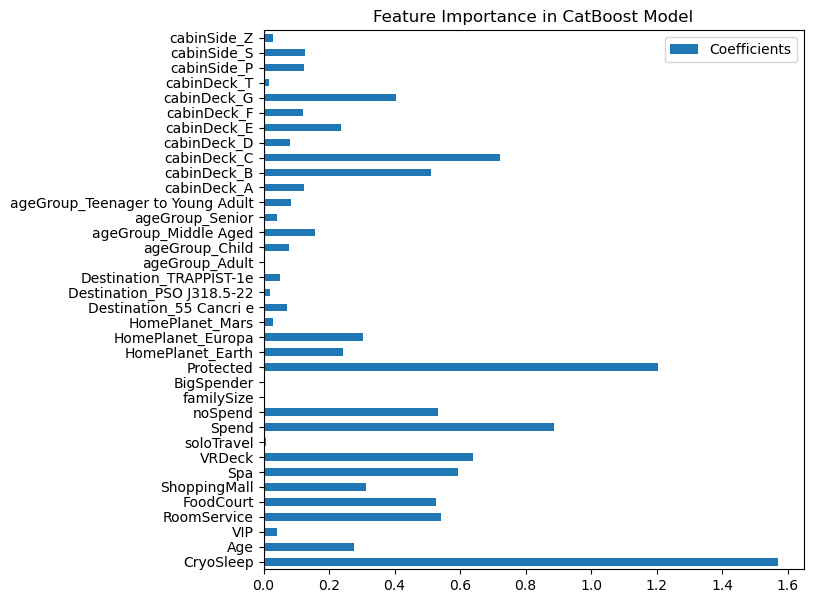

In [85]:
# Adjust the key to access CatBoostClassifier from the pipeline's named_steps
feature_imp_catboost = catboost.named_steps['catboostclassifier'].feature_importances_

# Ensure xVar_train.columns are the features used in the model
# If xVar_train has been transformed (e.g., scaled), make sure the column names match the original features

# Creating a DataFrame for visualization
coefs_catboost = pd.DataFrame(
   feature_imp_catboost,
   columns=['Importance'], index=xVar_train.columns
).sort_values(by='Importance', ascending=True)

# Plotting feature importances
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Importance in CatBoost Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()

Since the variables were scaled using a MinMaxScaler, coefficients can be interpreted according to their impact on the target variable (transported). Whether a person is in CryoSleep or not proves to have the highest impact on them getting transported or not. Additionally, the binary variable indicating if a passenger was protected (based on their cryo sleep status and being located in cabin deck B or C) has a high impact. From the EDA, and as per definition, it is known that these variables are highly correlated. The model has been trained choosing only selected variables to account for multicollinearity. However, the model has proven to be most accurate when including all of the variables above.

##### Version 2 - Cat Boost Tuned with GridSearch

In [86]:
'''
# Initialize the CatBoostClassifier
catb = CatBoostClassifier(verbose=0)  # Turn off verbose to silence detailed output during training

# Define the parameter grid 
param_grid_catb = {
    'iterations': [300, 400, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
    'depth': [2, 5, 10]
}

# Set up the GridSearchCV object
catboost_tuned = GridSearchCV(estimator=catb, param_grid=param_grid_catb, cv=5, n_jobs=-1)

# Fit the grid search to your data
catboost_tuned.fit(xVar_train, yVar_train)

# Print the mean accuracy for CatBoost with GridSearch
print('Mean accuracy:', catboost_tuned.score(xVar_test, yVar_test))

# Print the best parameters found by GridSearchCV
print("Best parameters found for CatBoost Classifier:")
print(catboost_tuned.best_params_)
'''

'\n# Initialize the CatBoostClassifier\ncatb = CatBoostClassifier(verbose=0)  # Turn off verbose to silence detailed output during training\n\n# Define the parameter grid \nparam_grid_catb = {\n    \'iterations\': [300, 400, 500, 1000],\n    \'learning_rate\': [0.01, 0.03, 0.05, 0.07, 0.09],\n    \'depth\': [2, 5, 10]\n}\n\n# Set up the GridSearchCV object\ncatboost_tuned = GridSearchCV(estimator=catb, param_grid=param_grid_catb, cv=5, n_jobs=-1)\n\n# Fit the grid search to your data\ncatboost_tuned.fit(xVar_train, yVar_train)\n\n# Print the mean accuracy for CatBoost with GridSearch\nprint(\'Mean accuracy:\', catboost_tuned.score(xVar_test, yVar_test))\n\n# Print the best parameters found by GridSearchCV\nprint("Best parameters found for CatBoost Classifier:")\nprint(catboost_tuned.best_params_)\n'

- Mean accuracy: 0.8148006134969326
- Best parameters found for CatBoost Classifier:
{'depth': 5, 'iterations': 300, 'learning_rate': 0.05}

In [87]:
# Tuned CatBoost Classifier with modified parameters
catboost_tuned = CatBoostClassifier(depth=5,iterations=300,learning_rate=0.05,verbose=0)

catboost_tuned.fit(xVar_train, yVar_train)

y_pred_catbtuned = catboost_tuned.predict(xVar_test)
print('Accuracy of Catboost classifier on test set: {:.2f}'.format(catboost_tuned.score(xVar_test, yVar_test)))
print(classification_report(yVar_test, y_pred_catbtuned))

Accuracy of Catboost classifier on test set: 0.82
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1295
           1       0.80      0.85      0.82      1313

    accuracy                           0.82      2608
   macro avg       0.82      0.82      0.82      2608
weighted avg       0.82      0.82      0.82      2608



##### Version 3 - Cat Boost Tuned with GridSearch on entire train set

- Since applying a GridSearch to the Categorical Boosting model shows promising results for accuracy, it will be trained on the entire train set (disregarding the previous train-test-split) in an effort to increase the accuracy even further. It seems like this may be the most accurate model, the so-called champion model! 

In [88]:
'''
# Initialize the CatBoostClassifier
catb = CatBoostClassifier(verbose=0)  # Turn off verbose to silence detailed output during training

# Define the parameter grid 
param_grid_catb = {
    'iterations': [300, 400, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09],
    'depth': [2, 5, 10]
}

# Set up the GridSearchCV object
catboost_tuned = GridSearchCV(estimator=catb, param_grid=param_grid_catb, cv=5, n_jobs=-1)

# Fit the grid search to your data
catboost_tuned.fit(xVarEncoded, yVar)

# Print the mean accuracy for CatBoost with GridSearch
print('Mean accuracy:', catboost_tuned.score(xVarEncoded, yVar))

# Print the best parameters found by GridSearchCV
print("Best parameters found for CatBoost Classifier:")
print(catboost_tuned.best_params_)
'''

'\n# Initialize the CatBoostClassifier\ncatb = CatBoostClassifier(verbose=0)  # Turn off verbose to silence detailed output during training\n\n# Define the parameter grid \nparam_grid_catb = {\n    \'iterations\': [300, 400, 500, 1000],\n    \'learning_rate\': [0.01, 0.03, 0.05, 0.07, 0.09],\n    \'depth\': [2, 5, 10]\n}\n\n# Set up the GridSearchCV object\ncatboost_tuned = GridSearchCV(estimator=catb, param_grid=param_grid_catb, cv=5, n_jobs=-1)\n\n# Fit the grid search to your data\ncatboost_tuned.fit(xVarEncoded, yVar)\n\n# Print the mean accuracy for CatBoost with GridSearch\nprint(\'Mean accuracy:\', catboost_tuned.score(xVarEncoded, yVar))\n\n# Print the best parameters found by GridSearchCV\nprint("Best parameters found for CatBoost Classifier:")\nprint(catboost_tuned.best_params_)\n'

- Mean accuracy: 0.8325089152191418
- Best parameters found for CatBoost Classifier:
{'depth': 5, 'iterations': 300, 'learning_rate': 0.05}

As this model turned out to be the most accurate, it will be used to predict which passengers, out of the ones where information on transportation status got lost on, to focus rescure efforts on.

# Preparing Submission

In [89]:
# Tuned CatBoost Classifier with modified parameters
catboost_tuned = CatBoostClassifier(depth=5,iterations=400,learning_rate=0.03,verbose=0)

catboost_tuned.fit(xVarEncoded, yVar)

y_pred_catbtuned = catboost_tuned.predict(testEncoded)

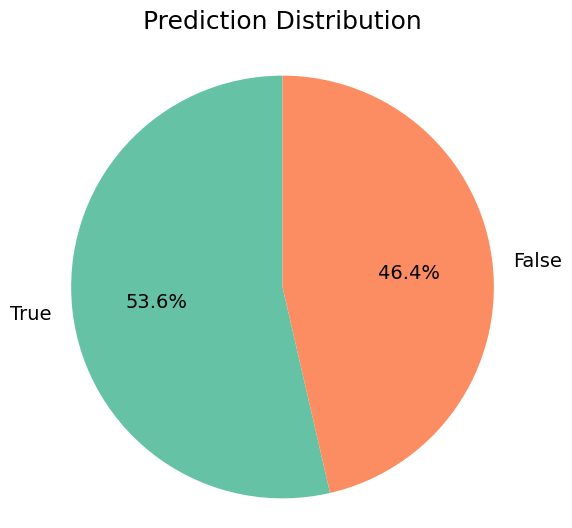

In [90]:
# Read sample submission
submission = pd.read_csv('sample_submission.csv')

# Add predictions
submission['Transported'] = y_pred_catbtuned.astype(bool)

# Plot prediction distribution
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62'] 
plt.pie(submission['Transported'].value_counts(), labels=['True', 'False'], 
        autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14})
plt.title("Prediction Distribution", fontsize=18, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Write test predictions using the sample_submission format
submission[['PassengerId', 'Transported']].to_csv('kaggle_submission_catboost_tuned.csv', index=False)

- Kaggle Score: 0.81038!

## Challenger Model

This is an attempt to enhance the original train dataset by combining it with the predictions of the champion model, thereby increasing the size of the train set from ~8000 to ~12000 observations. Similar approaches have been made before with previous models, such as the tuned random forest, where this technique successfully increased the model accuracy on Kaggle. This approach may bare the risk of amplifying false positive or negative predictions, but it could also increase performance due to the larger size of the dataset and the relatively high accuracy of over 80% of the previous model. 

##### Building a combined dataset to fit the model on train and predicted test set 

In [91]:
subfile = submission[['PassengerId', 'Transported']]
subfile = subfile['Transported'].replace({False:0, True:1})
subfile

0       1
1       0
2       1
3       1
4       1
       ..
4272    1
4273    0
4274    1
4275    1
4276    1
Name: Transported, Length: 4277, dtype: int64

In [92]:
# Concat test and train
xVar_new = pd.concat([xVarEncoded, testEncoded], axis=0).reset_index(drop=True)
xVar_new

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,soloTravel,Spend,noSpend,familySize,BigSpender,Protected,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,ageGroup_Adult,ageGroup_Child,ageGroup_Middle Aged,ageGroup_Senior,ageGroup_Teenager to Young Adult,cabinDeck_A,cabinDeck_B,cabinDeck_C,cabinDeck_D,cabinDeck_E,cabinDeck_F,cabinDeck_G,cabinDeck_T,cabinSide_P,cabinSide_S,cabinSide_Z
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1,4,0,1,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,6.602588,0,4,0,0,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,9.248021,0,7,0,0,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,8.551981,0,7,0,0,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,6.995766,0,9,0,0,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,34.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1,10,0,1,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
12966,0,42.0,0,0.000000,6.742881,2.890372,2.397895,4.976734,1,6.926577,0,6,0,0,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
12967,1,33.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,1,4,0,1,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
12968,0,34.0,0,0.000000,7.893945,0.000000,0.000000,6.261492,1,8.072155,0,7,0,0,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False


In [93]:
yVar

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [94]:
yVar_new = pd.concat([yVar, subfile], axis=0).reset_index(drop=True)
yVar_new

0        0
1        1
2        0
3        0
4        1
        ..
12965    1
12966    0
12967    1
12968    1
12969    1
Name: Transported, Length: 12970, dtype: int64

In [95]:
# Traintestsplit
xVar_new_train, xVar_new_test, yVar_new_train, yVar_new_test = train_test_split(
            xVar_new, 
            yVar_new, 
            test_size    = 0.3,
            stratify     = yVar_new,
            random_state = 42)

##### Version 4 - Cat Boost Tuned with GridSearch and RobustScalar on enhanced train set

In [96]:
# Tuned Catboost
catb_tuned = make_pipeline(RobustScaler(), CatBoostClassifier(depth=10,iterations=400,learning_rate=0.03,verbose=0))

# Training the model with training data
catb_tuned.fit(xVar_new, yVar_new)

y_pred_catbtuned_enhanced = catb_tuned.predict(testEncoded)

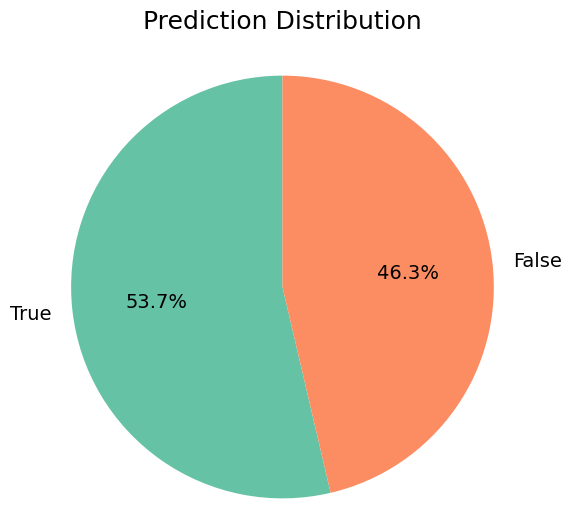

In [97]:
# Add predictions
submission['Transported'] = y_pred_catbtuned_enhanced.astype(bool)

# Plot prediction distribution
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62'] 
plt.pie(submission['Transported'].value_counts(), labels=['True', 'False'], 
        autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14})
plt.title("Prediction Distribution", fontsize=18, pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Write test predictions using the sample_submission format
submission[['PassengerId', 'Transported']].to_csv('kaggle_submission_catboost_tuned_enhanced.csv', index=False)

- Kaggle Score: 0.81014! - Almost, but not quite!

A grid search was conducted to improve the performance of the model. Unfortunately, in this case the accuracy did not increase compared to the original champion model. This may indicate that the model is now overfitting after training it on the predictions of the champion model. Therefore, the initial model will be the champion model. 

   <hr style="height: 4px; background-color: #2B547E;">
</h1> 

# Bibliography

George, S. C., & Sumathi, B. (2020). Grid Search Tuning of Hyperparameters in Random Forest Classifier for Customer Feedback Sentiment Prediction. _International Journal of Advanced Computer Science and Applications,_ 11(9).

Gupta, D. (2018). _Applied Analytics through Case Studies Using SAS and R: Implementing Predictive Models and Machine Learning Techniques._ Apress.

Hancock, J. T. & Khoshgoftaar T. M. CatBoost for big data: an interdisciplinary review. _Journal of Big Data_. (2020) 7:94. https://doi.org/10.1186/s40537-020-00369-8